In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
G = nx.random_regular_graph(3,50,seed=14)
for u, v in G.edges:
    G[u][v]['weight'] = random.randint(3,10)

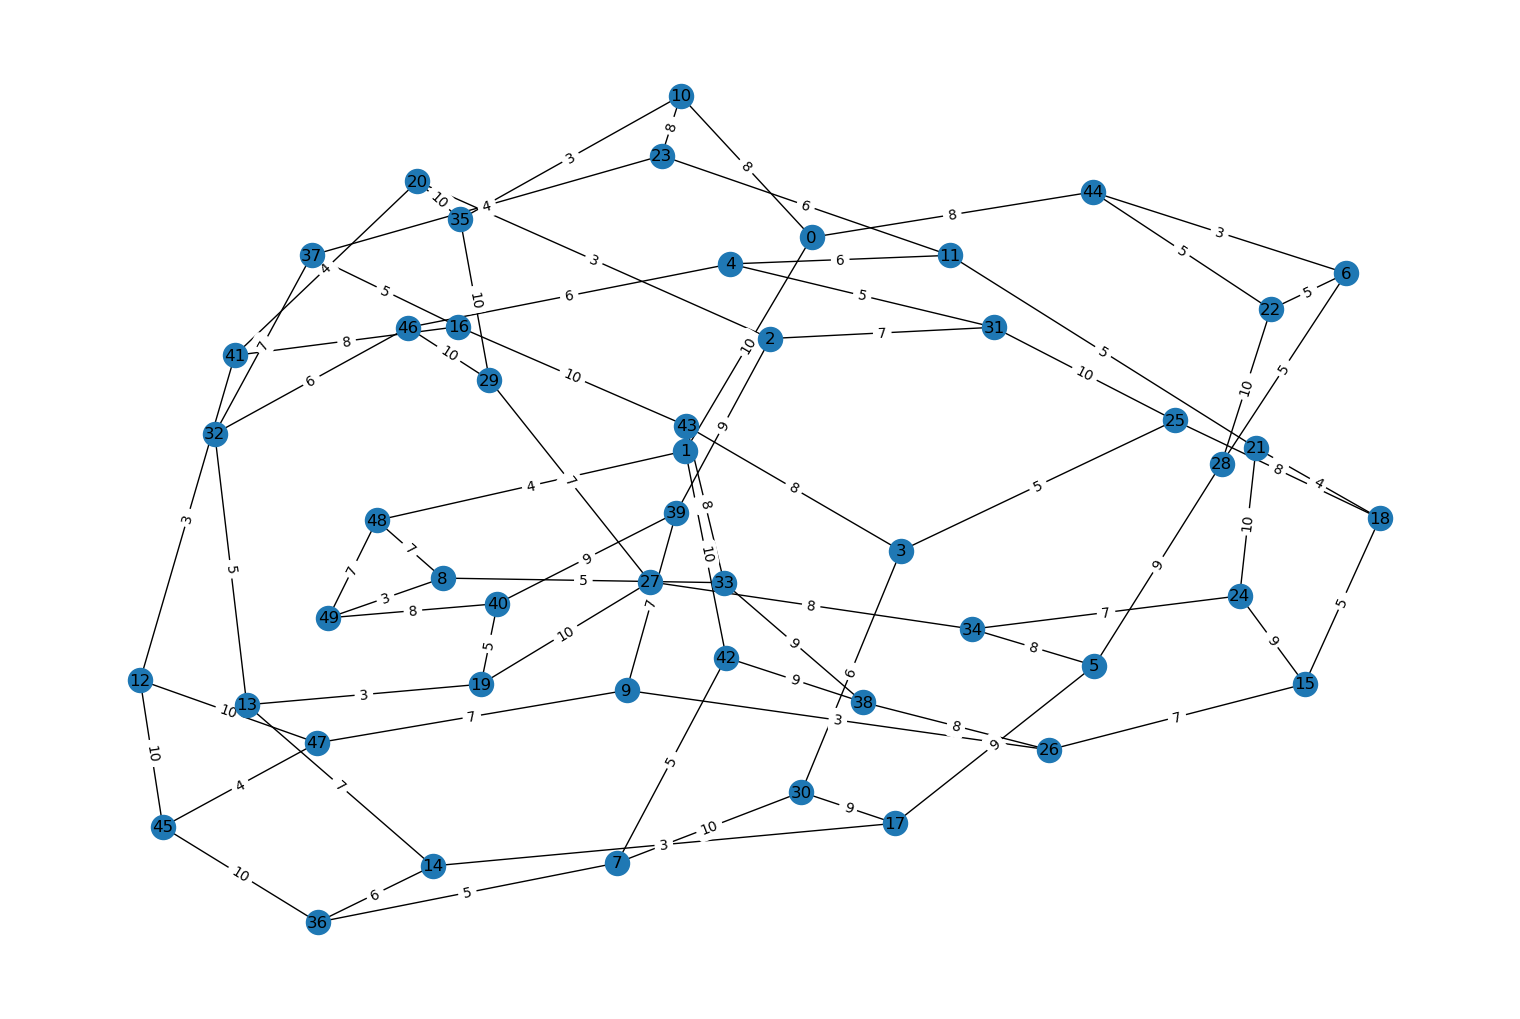

In [3]:
weight = nx.get_edge_attributes(G, "weight")
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, seed=6)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G,pos,  edge_labels=weight)
plt.show()

In [4]:
print(list(nx.find_cliques(G)))

[[0, 1], [0, 10], [0, 44], [2, 20], [2, 31], [2, 39], [3, 25], [3, 43], [3, 30], [4, 11], [4, 46], [4, 31], [5, 17], [5, 34], [5, 28], [6, 22, 44], [6, 22, 28], [7, 42], [7, 36], [7, 30], [8, 48, 49], [8, 33], [9, 26], [9, 47], [9, 39], [11, 21], [11, 23], [12, 41], [12, 45, 47], [13, 32], [13, 19], [13, 14], [14, 17], [14, 36], [15, 24], [15, 26], [15, 18], [16, 41], [16, 43], [16, 37], [17, 30], [18, 25], [18, 21], [19, 40], [19, 27], [20, 41], [20, 35], [21, 24], [23, 10], [23, 37], [24, 34], [25, 31], [26, 38], [27, 34], [27, 29], [29, 35], [29, 46], [32, 37], [32, 46], [33, 43], [33, 38], [35, 10], [36, 45], [38, 42], [39, 40], [40, 49], [42, 1], [48, 1]]


In [10]:
spl=dict(nx.all_pairs_dijkstra_path_length(G))

dict_ecc = nx.eccentricity(G, sp=spl)

Периферийные вершины

In [11]:
nx.periphery(G, e=dict_ecc)

[49, 48, 21]

Расстояние между перефирийными вершинами

In [12]:
diametr = nx.diameter(G, e=dict_ecc)
diametr

48

# ОДМВ

In [13]:
T = nx.minimum_spanning_tree(G)
edge_T = T.edges

Получим объект для определения расстояния между узлами

In [14]:
color_map = []
for edge in G.edges:
    if edge in edge_T:
        color_map.append('blue')
    else: 
        color_map.append('grey')   

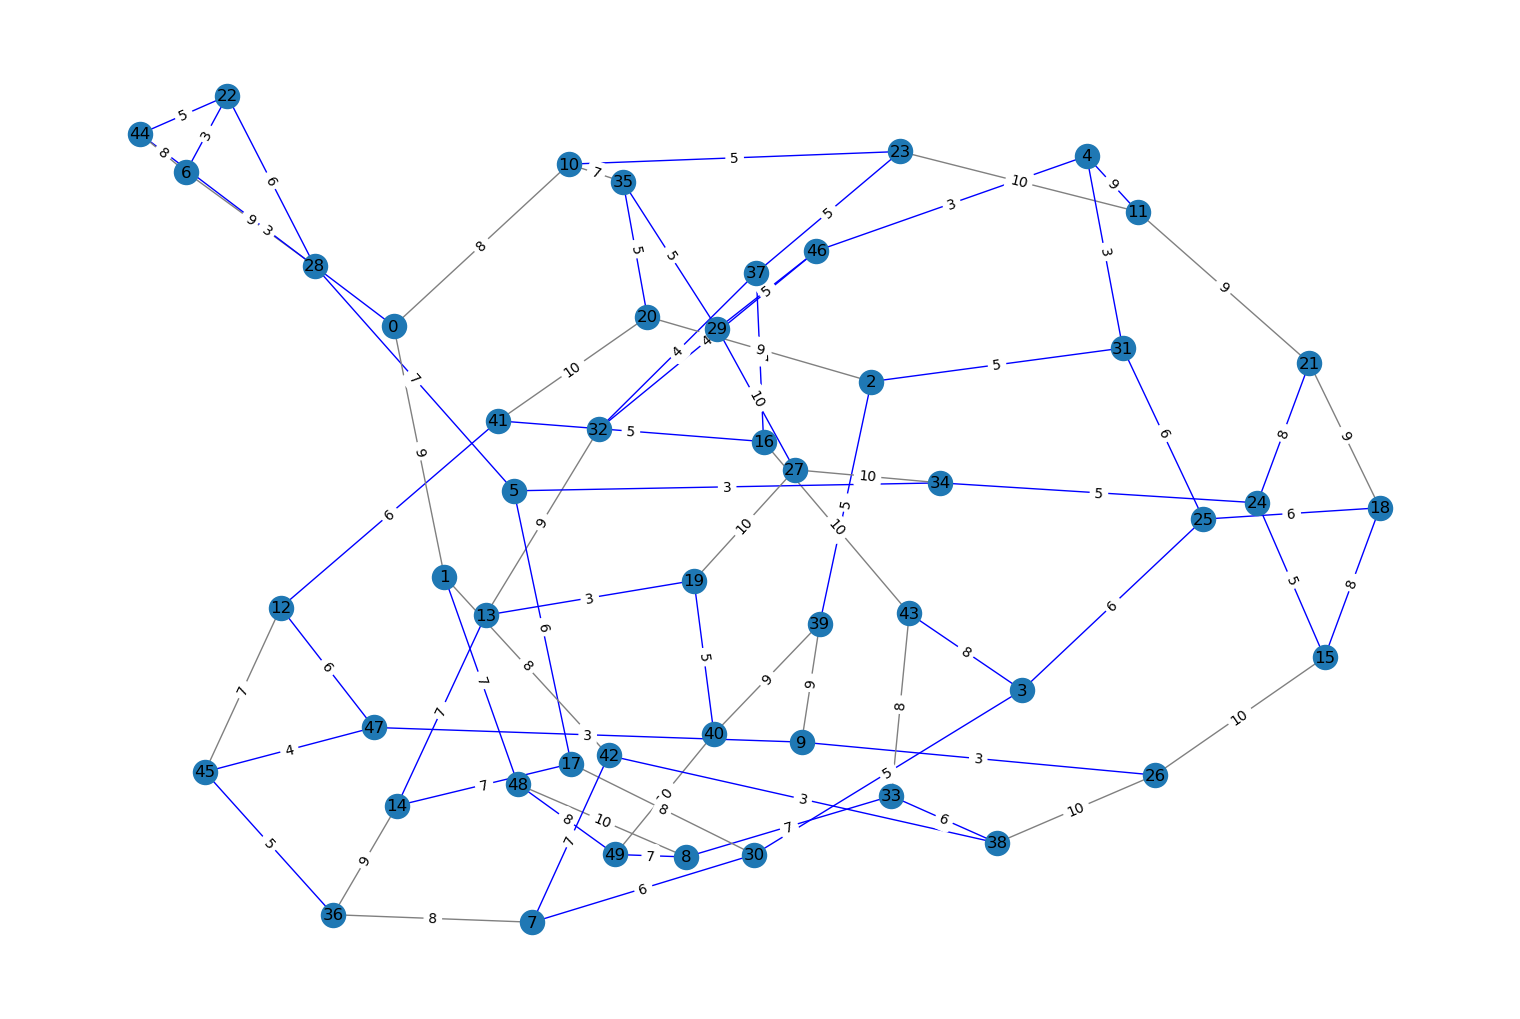

In [15]:
weight = nx.get_edge_attributes(G, "weight")
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, seed=6)
nx.draw(G, pos, with_labels=True, edge_color=color_map)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

Изменим веса трех рандомных ребер от 1 до 3 и посчитаем сумму ОДМВ по каждой итерации

In [16]:
x_cor = []
y_cor =[]

for i in range(10):
    copy_G = G.copy()
    random_edges = random.sample(list(copy_G.edges), 3)
    for u, v in random_edges:
        copy_G[u][v]['weight'] = random.randint(1,2)
        
    T = nx.minimum_spanning_tree(copy_G)
    edge_T = T.edges
    spl = dict(nx.all_pairs_dijkstra_path_length(copy_G))
    summ = 0
    for edge in copy_G.edges:
        if edge in edge_T:
            summ+=(spl[edge[0]][edge[1]])
    x_cor.append(i)
    y_cor.append(summ)


In [17]:
x_cor

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [18]:
y_cor

[261, 259, 261, 251, 256, 253, 259, 254, 255, 252]

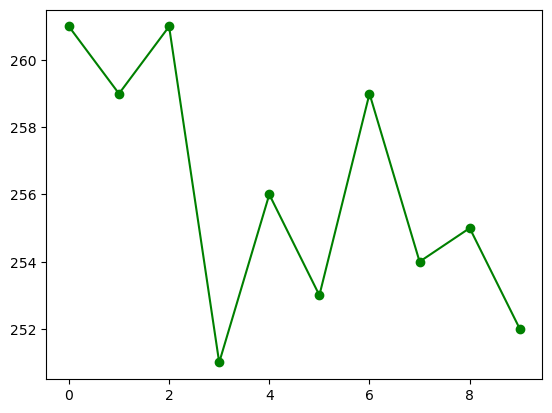

In [19]:
plt.plot(x_cor, y_cor, marker='o', color='green')